## Linear Regression practice

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.system("wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

--2025-10-07 19:39:56--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

     0K .......... .......... .......... .......... ..........  5% 25.6M 0s
    50K .......... .......... .......... .......... .......... 11% 27.4M 0s
   100K .......... .......... .......... .......... .......... 17%  127M 0s
   150K .......... .......... .......... .......... .......... 23% 64.2M 0s
   200K .......... .......... .......... .......... .......... 29% 57.3M 0s
   250K .......... .......... .......... .......... .......... 35% 76.6M 0s
   300K .......... .......... .......... .......... .......... 40%  110M 0s
   350K .

0

In [3]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

engine_displacement
[170 130 220 210 190]
36

num_cylinders
[ 3.  5. nan  4.  1.]
14

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

acceleration
[17.7 17.8 15.1 20.2 14.4]
162

model_year
[2003 2007 2018 2009 2008]
24

origin
['Europe' 'USA' 'Asia']
3

fuel_type
['Gasoline' 'Diesel']
2

drivetrain
['All-wheel drive' 'Front-wheel drive']
2

num_doors
[ 0.  2. -1.  1. nan]
9

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704



In [10]:
col_required = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[col_required]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [11]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [17]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [13]:
for col in df.columns:
    print(col)
    print(df[col].nunique())
    print()

engine_displacement
36

horsepower
192

vehicle_weight
9704

model_year
24

fuel_efficiency_mpg
9704



In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

array([[<Axes: title={'center': 'engine_displacement'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'vehicle_weight'}>,
        <Axes: title={'center': 'model_year'}>],
       [<Axes: title={'center': 'fuel_efficiency_mpg'}>, <Axes: >]],
      dtype=object)

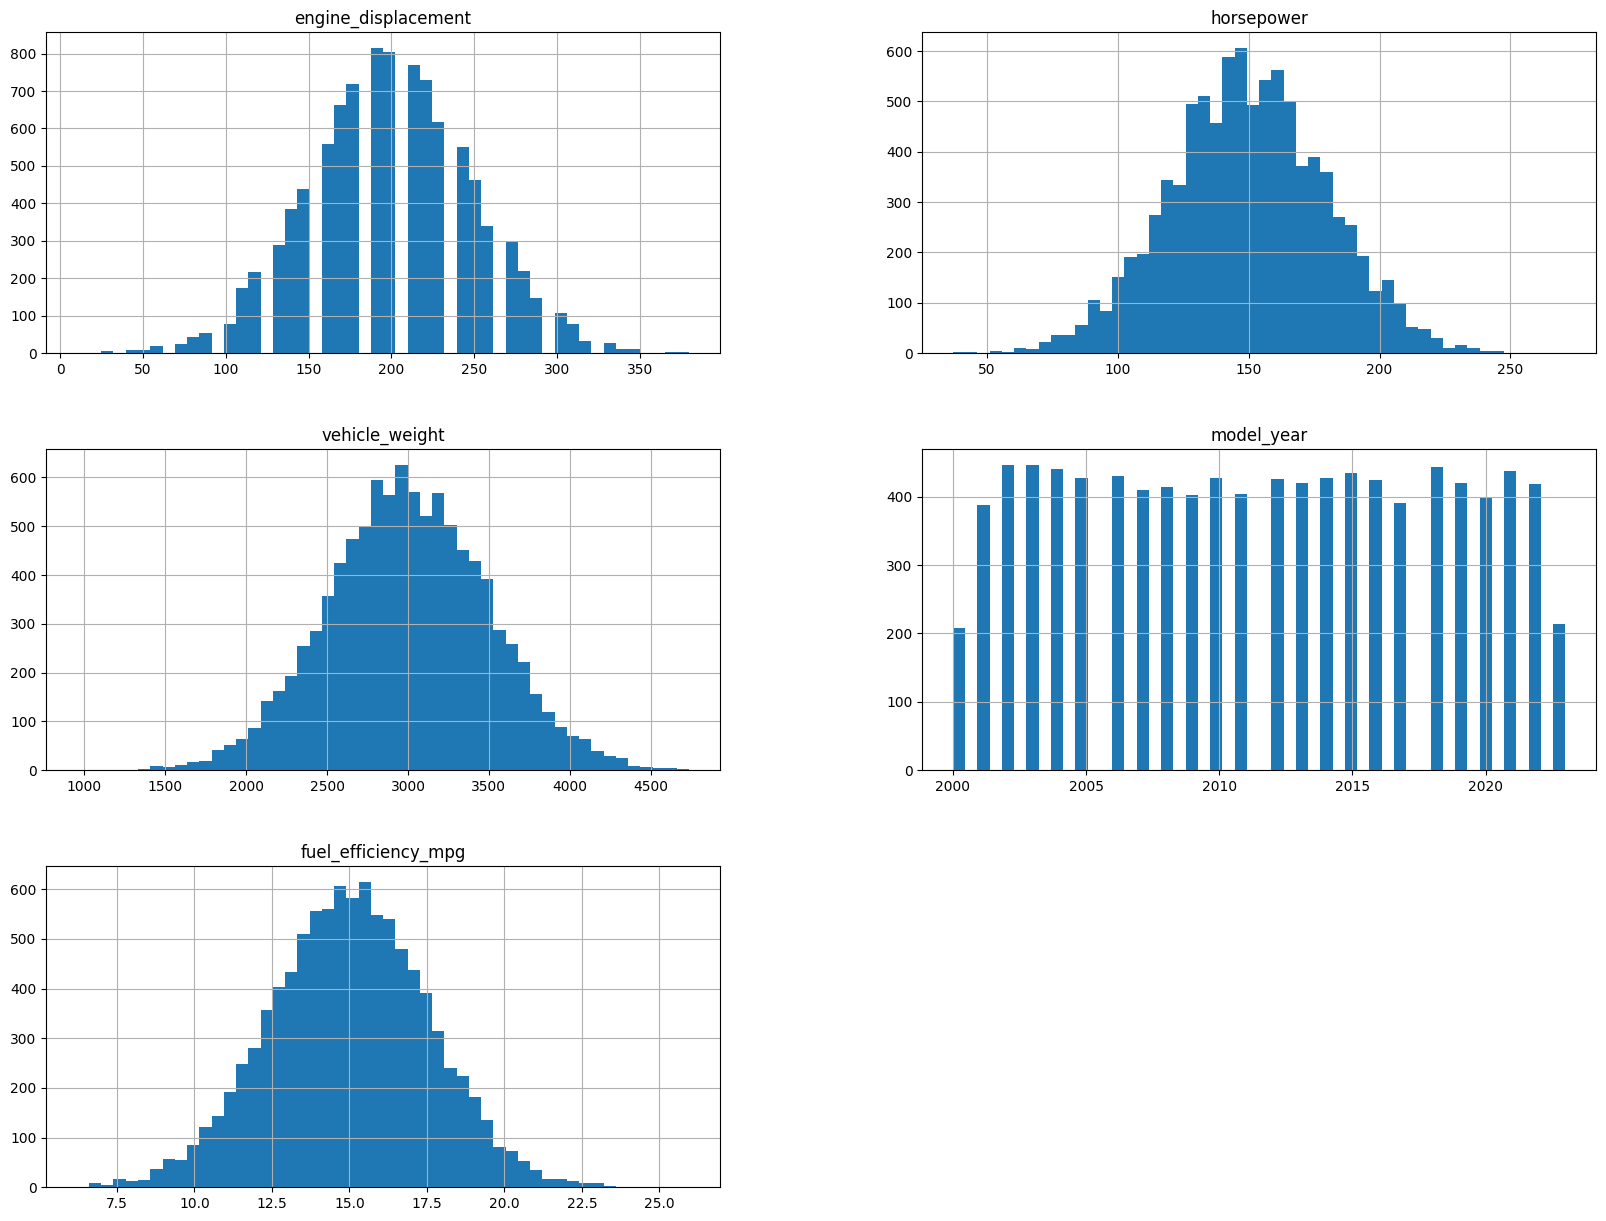

In [15]:
df.hist(bins=50, figsize=(20,15))

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

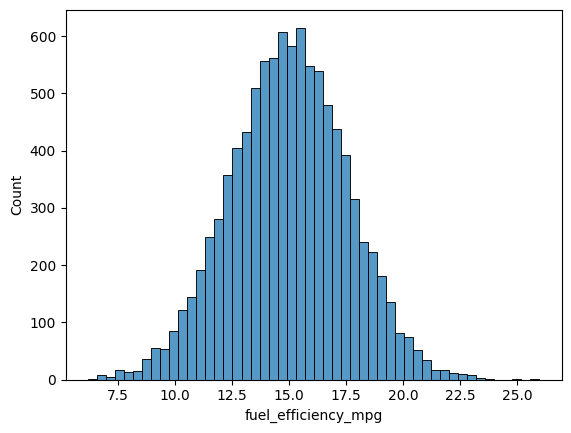

In [16]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

In [ ]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']


X_train = df_train[base].fillna(0).values
X_train

In [23]:
n = len(df)

idx = np.arange(n)
idx

array([   0,    1,    2, ..., 9701, 9702, 9703], shape=(9704,))

In [24]:
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [25]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test 

In [26]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [27]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [33]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [34]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [35]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [36]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [37]:
df_val.isnull().sum()

engine_displacement      0
horsepower             136
vehicle_weight           0
model_year               0
dtype: int64

In [40]:
len(y_train)

5824

## Q 3, fill missing values with 0

In [55]:
def prepare_X_0(df):
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X

In [56]:
def train_linear_regression(X, y):
    one = np.ones(X.shape[0])
    X = np.column_stack([one, X])
    XTX = (X.T).dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [57]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    score = np.sqrt(mse)
    return round(score, 2) 

In [44]:
## Training the model
X_train = prepare_X_0(df_train)
w0, w = train_linear_regression(X_train, y_train)

## Validate the model
X_val = prepare_X_0(df_val)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.52)

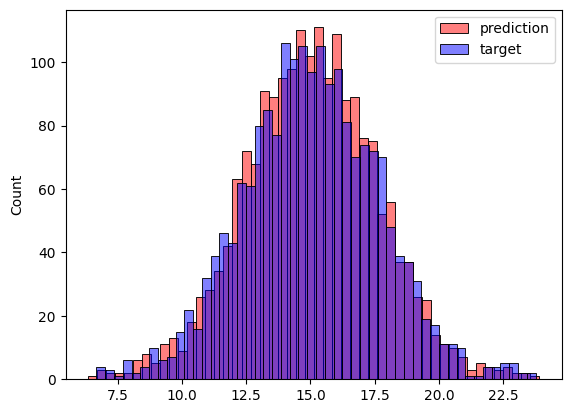

In [45]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## Q 3, fill missing values with mean

In [48]:
m = df_train['horsepower'].mean()
m

np.float64(149.54476367006487)

In [49]:
def prepare_X_mean(df):
    df = df.copy()
    df = df.fillna(m)
    X = df.values
    return X

In [50]:
## Training the model
X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)

## Validate the model
X_val = prepare_X_mean(df_val)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.46)

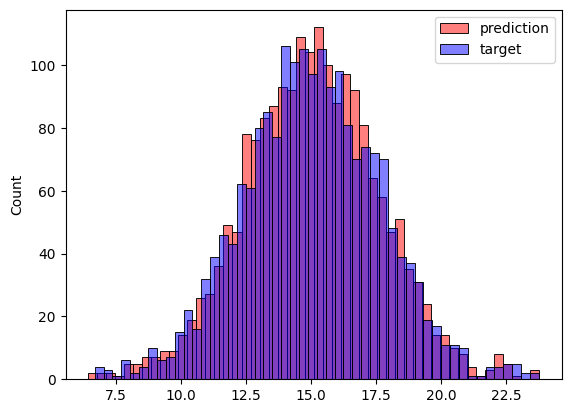

In [51]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## Q 4, train with regularized linear regression with NA as 0

In [52]:
def prepare_X(df):
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X

In [53]:
def train_linear_regression_reg(X, y, r):
    one = np.ones(X.shape[0])
    X = np.column_stack([one, X])

    XTX = (X.T).dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [54]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(r, w0, score)

0.0 28.827365475106156 0.52
1e-05 28.82285530221362 0.52
0.0001 28.782327171256668 0.52
0.001 28.383227517945336 0.52
0.1 11.239661084961272 0.52
1 1.7315979411936366 0.52
10 0.18306246622306527 0.52


## Q5

In [ ]:
n = len(df)
idx = np.arange(n)

In [ ]:
standard_dev = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)
    np.random.shuffle(idx)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test 

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    ## Training the model
    X_train = prepare_X_0(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    ## Validate the model
    X_val = prepare_X_0(df_val)

    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(score)
    standard_dev.append(score)

0.52
0.52
0.53
0.5
0.52
0.52
0.52
0.52
0.52
0.53


In [67]:
std = round (np.std(standard_dev), 3) 
std

np.float64(0.008)

## Q 5